<a href="https://colab.research.google.com/github/kanakhan/GMSW/blob/main/word2vec(%EC%88%98%EC%97%85)(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 임베딩(embeding)

* 자연어 처리의 핵심은 인간이 사용하는 자연어의 의미를 어떻게 하면 그 의미 그대로 컴퓨터가 이해할 수 있는 숫자로 바꿀 수 있는지에 대한 노력의 연속
* 텍스트를 숫자로 바꾸는 작업을 임베딩(embedding)이라고 하고 그러다 보니 다양한 임베딩 방식이 존재
* 우리는 이미 텍스트를 숫자로 바꾸는 노력으로 빈도(frequency)를 중심으로 한 BOW, DTM, TF-IDF를 살펴봄.
* 하지만 이러한 방식은 문맥을 고려하지 않고 각각의 단어의 빈도수만 계산하기 때문에 자연어의 의미가 기계어로 정확하게 바뀌지가 않음.
* 그래서 주변 단어의 출현 빈도까지 고려하는 임베딩 방법이 필요



###### One-hot encoding

* 전체 단어 수를 기준으로 해당 단어에 1을 부여하고, 나머지는 0을 부여해 벡터 값을 구성


* "I study Python and Java"이라는 문장에 대해 각각의 단어를 one-hot encoding을 한다면


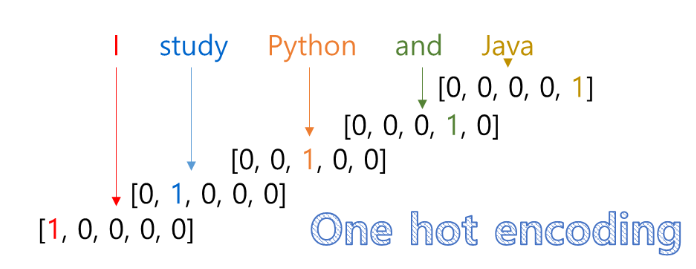

* 인간이 판단하기에는 5개의 단어 중에 'Python'과 'Java'는 프로그램 언어라는 측면에서 유사해 보임
* 하지만 'I'와 'Python'은 전혀 연관성이 없는 단어로 보이지만, one-hot encoding은 단어끼리의 유사성과 연관성을 전혀 반영하지 못함.
* 또한 문장에 포함된 단어가 많을 경우 해당 단어는 하나의 1의 값을 갖고 나머지는 모두 0 이 되어 대부분이 0인 값을 갖는 벡터를 희소(sparse) 벡터가 됨.

## Word2Vec 이해하기

* 텍스트의 단어들을 벡터로 변환할 때 문맥을 의미를 담을 수 없을까?

> 단어와 단어 간의 관계가 벡터를 통해서 드러나야 하고, 그러려면 비슷한 의미의 단어들은 비슷한 벡터로 표현되어야 함.




* 예를 들어 'sugar'와 'salt'의 관계가 'sweet'와 ' salty'의 관계라는 것을, '한국'과 '서울'이 '국가'와 '수도'의 관계


* 단어를 벡터로 바꿀 때 단어의 의미가 최대한 벡터에 담기도록 하는 작업

* 이러한 임베딩의 대표적인 방식이 구글에서 2013년에 개발한 Word2Vec 모델



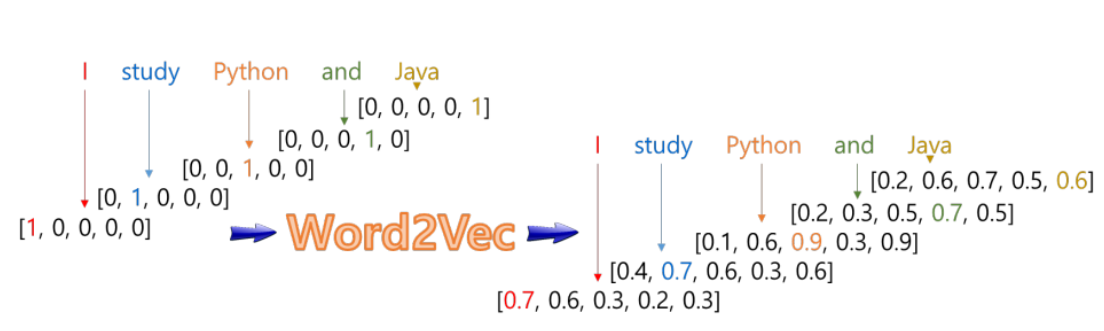

#### Word2Vec의 원리

* Word2Vec의 원리는 "주변 단어를 보면 해당 단어를 추측할 수 있다'라는 아이디어에서 출발


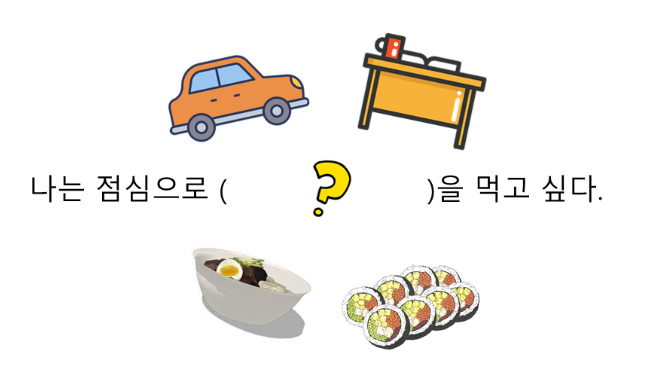

### Word2Vec의 CBoW(continuous Bag of Words) 알고리즘

* Word2Vec는 이웃한 단어들이 서로 의미가 유사하다는 가설에 의존
* Word2Vec에는 CBoW와 Skip-Gram이라는 두 가지 학습 방법이 존재



#### CBoW


* CBoW는 주변에 있는 단어(맥락)로 중간에 있는 단어(타깃 단어, 중심 단어)를 예측하는 방식


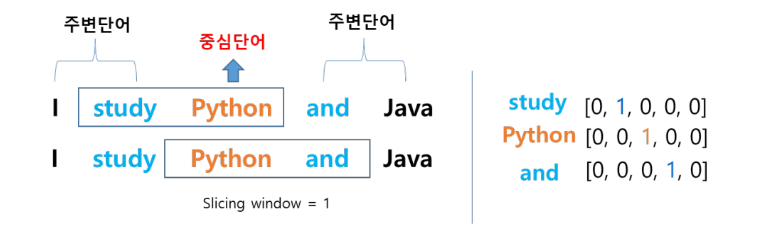

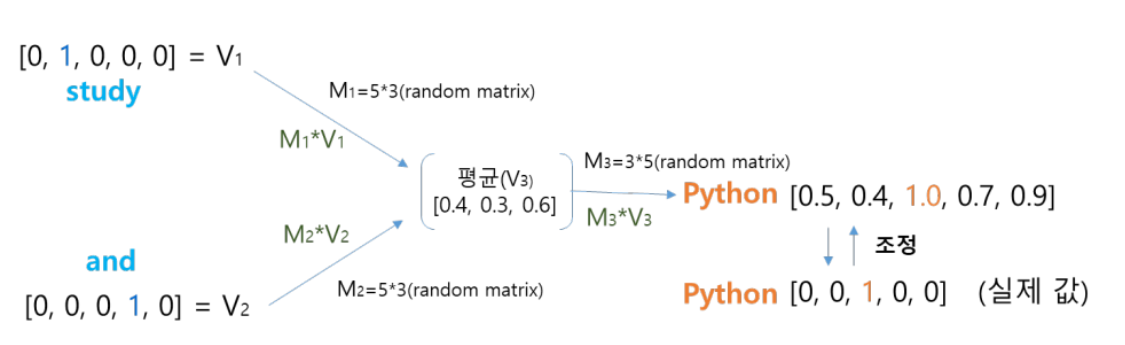

### Skip-Gram

* Skip-Gram은 CBoW와 반대되는 방식을 사용
*  중심 단어를 보고 어떤 단어가 주변 단어로 존재하는지를 예측하는 모형


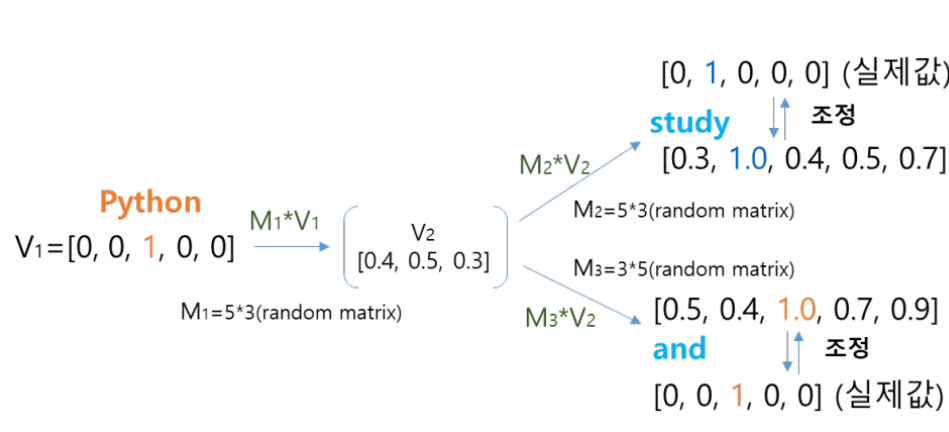

## Word2Vec 임베딩 실습

* 파이썬에서는 gensim이라는 라이브러리에서 Word2Vect 클래스를 제공.
* gensim은 자연어를 벡터로 변환하는데 필요한 대부분의 기능을 제공
* 분석하고자 하는 텍스트가 2차원 리스트[["I", "love", "Python"], ["really". "you"]...]로 구성되어 있어야 함.


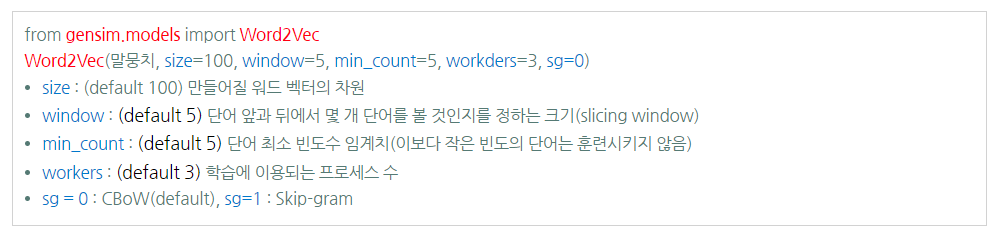


sentences = [['I', 'have', 'an', 'iPhone'],
             ['You', 'have', 'a', 'Galaxy'],
             ['I', 'have', 'a', 'very', 'good', 'iPhone', 'function'],
             ['Why', 'do', 'you', 'use', 'Galaxy'],
             ['Tell', 'me', 'a', 'good', 'function']]



###### Word2Vec 모델을 생성

In [1]:
from gensim.models import Word2Vec

sentences = [['I', 'have', 'an', 'iPhone'], 
             ['You', 'have', 'a', 'Galaxy'], 
             ['I', 'have', 'a', 'very', 'good', 'iPhone', 'function'], 
             ['Why', 'do', 'you', 'use', 'Galaxy'], 
             ['Tell', 'me', 'a', 'good', 'function']]

model = Word2Vec(sentences, min_count = 1)

print(model)



Word2Vec(vocab=16, size=100, alpha=0.025)


##### word2Vec() 모델에 의해 단어들이 어떻게 행렬 벡터로 임베딩 되었는지 확인


* 한단어 임베딩 확인

In [2]:
words = list(model.wv.vocab)
print(words)

['I', 'have', 'an', 'iPhone', 'You', 'a', 'Galaxy', 'very', 'good', 'function', 'Why', 'do', 'you', 'use', 'Tell', 'me']


In [3]:
print(model['Galaxy'])

[-1.78314431e-03  2.54972978e-03 -2.77547818e-03  1.87056537e-06
  9.09784343e-04 -3.91556975e-03  4.28986829e-03 -2.59817508e-03
 -3.72657389e-03 -3.99453659e-03 -4.54050535e-03  4.53354791e-03
 -7.85987999e-04  1.74100709e-03  2.78265076e-03  4.04851744e-04
 -1.96892978e-03  1.25973055e-03  2.44570943e-03 -4.40002943e-04
 -1.92983798e-03  4.47107246e-03  2.26375088e-03  4.30821208e-03
 -7.43835233e-04  4.72766580e-03  3.71051906e-03 -2.07363791e-03
  6.16109173e-04 -1.15324405e-03  2.01607775e-03  3.44408909e-03
 -4.29503713e-03  4.49699070e-03  4.84106923e-03 -3.22458777e-03
  3.13053560e-03 -9.10360075e-04 -4.90403641e-03  9.49649839e-04
 -8.88019858e-04  4.85352799e-03  3.08956672e-03 -1.80276518e-03
 -3.51353618e-03 -1.26687682e-03  4.60514333e-03  4.86870529e-03
 -3.43160261e-03  4.85176872e-03 -2.86580133e-03  1.78468134e-03
 -2.89759319e-03 -3.64802685e-03 -4.61875740e-03  4.12820885e-03
 -3.08507239e-03  4.53156233e-03  3.99228884e-03 -1.33097859e-03
 -4.82721208e-03  2.00369

<ipython-input-3-2470b95a600b>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(model['Galaxy'])


*  'iPhone'과 'Galaxy'와 가장 유사한 단어를 추출

In [4]:
model_Galaxy = model.wv.most_similar("Galaxy")
print(model_Galaxy)

[('do', 0.21598123013973236), ('iPhone', 0.19705389440059662), ('I', 0.17938722670078278), ('Tell', 0.11513470858335495), ('you', 0.1116744801402092), ('You', 0.06682389974594116), ('very', 0.06558522582054138), ('have', 0.03125957399606705), ('function', 0.00958845391869545), ('an', -0.014062929898500443)]


In [5]:
model_iphone = model.wv.most_similar("iPhone")
print(model_iphone)

[('Tell', 0.23011162877082825), ('Galaxy', 0.1970539093017578), ('you', 0.10827186703681946), ('a', 0.07864555716514587), ('very', 0.07674515247344971), ('use', 0.03998902067542076), ('me', -0.006580628454685211), ('Why', -0.009570501744747162), ('function', -0.009957477450370789), ('I', -0.028149627149105072)]


#### Word2Vect()로 학습된 모델을 저장하고 필요할 때 다시 오기


In [6]:
model.save('model.bin')

In [7]:
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=16, size=100, alpha=0.025)


### Word2Vec 임베딩 시작화

* 각화를 실시하는 방법은 여라 가지가 있지만 고차원 단어 벡터를 2차원 그림으로 줄이고 그래프를 그리는 주성분 분석(PCA, Principal Component Analysis) 방법 널리 사용
* PCA는 sklearn 라이브러리에서 불러올 수 있고, 2차원 그래프는 matplotlib의 pyplot을 이용


<ipython-input-9-0dba6e837190>:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


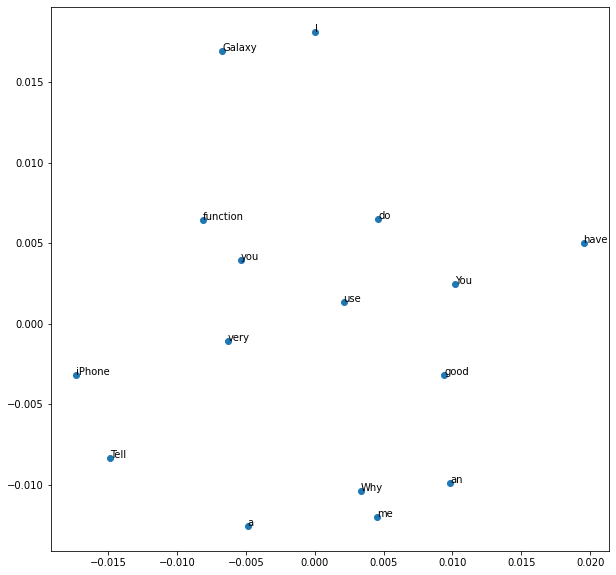

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.figure(figsize = (10,10))
plt.scatter(result[:,0], result[:,1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
  plt.annotate(word, (result[i,0], result[i,1]))

plt.show()